# Random walk with a GOOD random number generator

This time we will use the `rand` function provided by the Julia `Random` library. This function employs a [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) (pseudo-)random number generator.

In [2]:
using Random
Random.seed!(3)
rand(10)

10-element Vector{Float64}:
 0.8116984049958615
 0.9884323655013432
 0.8076220876500786
 0.9700908450487538
 0.14006111319509862
 0.5094438024440222
 0.05869740597593154
 0.004257960600515309
 0.9746379934512355
 0.5572251384524507

Lets reuse code we have saved before in a module file called "RandomWalk.jl"

In [3]:
include("RandomWalk.jl")
using .RandomWalk:  single_2DRW, plot_single_walk, sample_2DRW, plot_RNG_correlations

Now we can plot a random walk by calling `plot_single_walk`

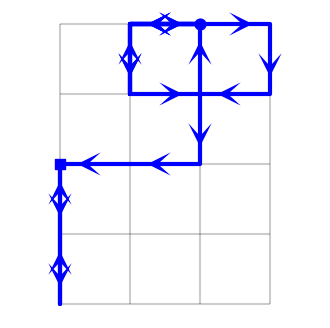

In [4]:
nsteps = 20
ran_vec = rand(nsteps)
x_vec, y_vec = single_2DRW(ran_vec)

plot_single_walk(x_vec, y_vec);

## Sampling random walks

We perform several random walks and record the average end-to-end distance of each component $\langle X^2\rangle$ and $\langle Y^2\rangle$, as well as the fluctuation $\langle X^4\rangle$ and $\langle Y^4\rangle$.

In [5]:
nsamples = 2000
nsteps_vec = 0:30:3000

x2_vec = [0.0 for i in nsteps_vec]
y2_vec = [0.0 for i in nsteps_vec]
x4_vec = [0.0 for i in nsteps_vec]
y4_vec = [0.0 for i in nsteps_vec]
xerr_vec = [0.0 for i in nsteps_vec]
yerr_vec = [0.0 for i in nsteps_vec]
etime_vec = [0.0 for i in nsteps_vec]
for (i,nsteps) ∈ enumerate(nsteps_vec)
    stats = @timed begin
        ran_vec = rand(nsamples*nsteps)
        av = sample_2DRW(ran_vec, nsamples, nsteps)
    end
    x2_vec[i] = av.x2
    y2_vec[i] = av.y2
    x4_vec[i] = av.x4
    y4_vec[i] = av.y4
    xerr_vec[i] = av.x4 - av.x2.^2
    yerr_vec[i] = av.y4 - av.y2.^2
    etime_vec[i] = stats.time
end

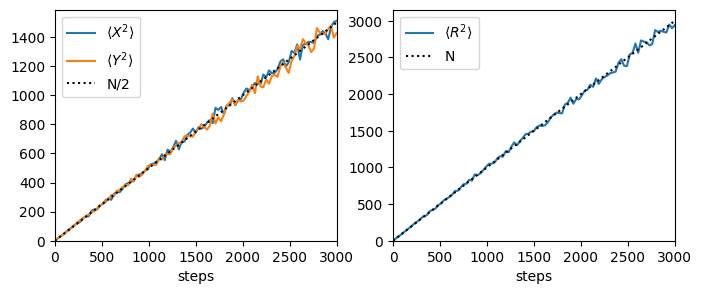

In [6]:
using PyPlot
PyPlot.rc("figure", figsize = (8, 3))

subplot(121)
plot(nsteps_vec, x2_vec, label=L"$\langle X^2\rangle$")
plot(nsteps_vec, y2_vec, label=L"$\langle Y^2\rangle$")
plot(nsteps_vec, 0.5*nsteps_vec, linestyle=":", color="k", label="N/2")

xlim(first(nsteps_vec), last(nsteps_vec))
ylim(0)
xlabel("steps")
legend();

subplot(122)
plot(nsteps_vec, x2_vec .+ y2_vec, label=L"$\langle R^2\rangle$")
plot(nsteps_vec, nsteps_vec, linestyle=":", color="k", label="N")

xlim(first(nsteps_vec), last(nsteps_vec))
ylim(0)
xlabel("steps")
legend();

We observe each direction of the walk is equally probable. Furthermore the end-to-end distance show a good agreement with the law $\langle R^2\rangle\sim t$.

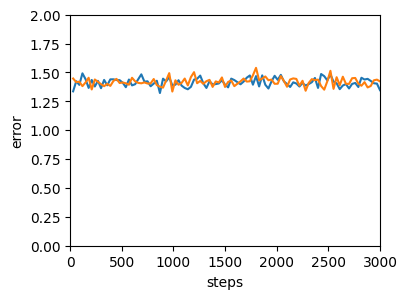

In [7]:
rsq_xerr_vec = sqrt.(xerr_vec) ./ x2_vec
rsq_yerr_vec = sqrt.(yerr_vec) ./ y2_vec

PyPlot.rc("figure", figsize = (4, 3))
plot(nsteps_vec, rsq_xerr_vec)
plot(nsteps_vec, rsq_yerr_vec)

xlim(first(nsteps_vec), last(nsteps_vec))
ylim(0.0,2.0)
xlabel("steps")
ylabel("error");

The error seems constant as it should be in a GOOD RNG.

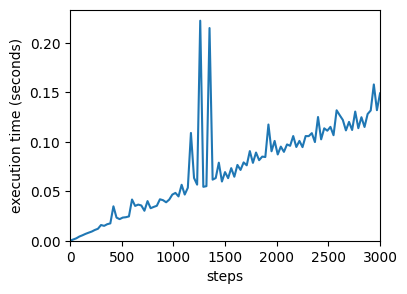

In [8]:
PyPlot.rc("figure", figsize = (4, 3))

plot(nsteps_vec, etime_vec)

xlim(first(nsteps_vec), last(nsteps_vec))
ylim(0)
xlabel("steps")
ylabel("execution time (seconds)");

## Testing the quality of the RNG

The quality of a random number generator can be seen if one tries to completely fill a $d$-dimensional lattice.

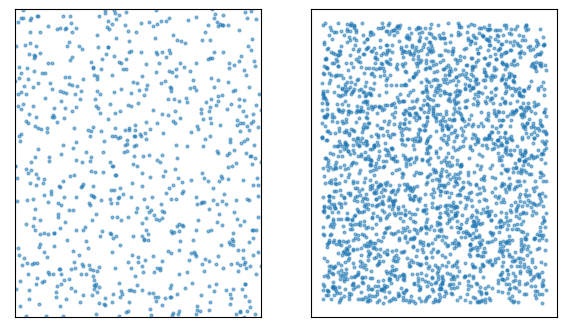

In [9]:
PyPlot.rc("figure", figsize=(7,4))

# Smaller region of the RNG
subplot(121)
ran_vec_good = rand(1500)
plot_RNG_correlations(ran_vec_good)
ax = gca()
ax.set_xlim([0,1500])
ax.set_ylim([0,1500])

# Larger region of the RNG
subplot(122)
ran_vec_bad = rand(5000)
plot_RNG_correlations(ran_vec_bad)
#ax = gca()
#ax.set_xlim([0,1500])
#ax.set_ylim([0,1500]);

We do not observe any strong correlations amonth the (pseudo-)random numbers.